[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/laiadc/MachineLearningHandsOn/blob/main//day6-10/Superhero%20or%20supervillain.ipynb)

# Superhero or supervillain?

**Help us predicting the superhero alignment according to her traits and powers.**

"You suddenly encounter a supersomething in front of you. Will she be good or bad? Fortunately, you just upgraded your supersuit with the Superhero alignment prediction smartwatch from Stark Corp."

<img src="superheroes_vs_supervillains.jpg" alt="Superheros vs supervillains" width=400>

That was the ad for the future product from Stark Corp. You, as a datascience team working in it, are in charge of developing the data prediction product that will make this possible.

"*Help us build a better future by building unnecessary superproducts*"

Source: https://www.kaggle.com/c/superhero-or-supervillain/data?select=train.csv

# The dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/train.csv")
data.head()

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,NaN,Yautja,Black,213.0,Dark Horse Comics,NaN,bad,234.0,...,False,False,False,False,False,False,False,False,False,False
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,NaN,good,86.0,...,False,False,False,False,False,False,False,False,False,False
2,2,Female,blue,Asgardian,Blond,175.0,Marvel Comics,NaN,good,143.0,...,False,False,False,False,False,False,False,False,False,False
3,3,Female,green,Mutant,Red,168.0,Marvel Comics,NaN,good,52.0,...,False,False,False,False,False,True,False,False,False,False
4,4,Female,Black,NaN,Black,163.0,Marvel Comics,NaN,good,50.0,...,False,False,False,False,False,False,False,False,False,False


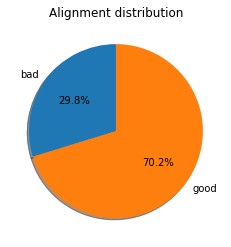

In [3]:
y = data['Alignment']
counts = data[['Alignment', 'Id']].groupby(['Alignment']).agg([ 'count'])
plt.pie(counts.values.flatten(), labels=counts.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Alignment distribution')
plt.show()

In [4]:
print('Number of rows (superheroes) = {}, number of columns (features) = {}'.format(data.shape[0], data.shape[1]))

Number of rows (superheroes) = 373, number of columns (features) = 177


During these days we are going to explore the steps needed to predict the aligment of the superheroes.

# Day 1

# Advanced programming for data analysis: pandas.

pandas is a Python package which allows to work with data in a fast and flexible way. It is a fundamental library for doing practical, real world, data science.

Pandas is mostly used when we work with tables, where rows are the samples and columns are features. pandas allows us to transform, and extract information from this table easily.

Key features:

+ Easy handling of missing data
+ Columns can be inserted and deleted from DataFrame easily
+ Allows to group the samples by a particular column.
+ Easy to extract parts of the data set
+ Intuitive merging and joining data sets
+ Compatible with multiple formats like Excel, csv, txt, ...

We start by importing pandas:

In [5]:
import pandas as pd  

# Pandas Data Structures

## 1. DataFrames

The key data structure in Pandas is the DataFrame object. A DataFrame is basically a table containig data, with rows and columns. Rows have a specific index to access them, which can be any name or value. Columns are the features corresponding to each row.

### Reading tabular data
Let us start reading the data we downloaded. The way to read CSV files in Pandas is by calling the read_csv method. 

In [6]:
data = pd.read_csv("data/train.csv")
data

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,NaN,Yautja,Black,213.0,Dark Horse Comics,NaN,bad,234.0,...,False,False,False,False,False,False,False,False,False,False
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,NaN,good,86.0,...,False,False,False,False,False,False,False,False,False,False
2,2,Female,blue,Asgardian,Blond,175.0,Marvel Comics,NaN,good,143.0,...,False,False,False,False,False,False,False,False,False,False
3,3,Female,green,Mutant,Red,168.0,Marvel Comics,NaN,good,52.0,...,False,False,False,False,False,True,False,False,False,False
4,4,Female,Black,NaN,Black,163.0,Marvel Comics,NaN,good,50.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,386,Female,green,Human,Blond,157.0,Dark Horse Comics,NaN,good,52.0,...,False,False,False,False,False,False,False,False,False,False
369,387,Female,blue,Human,Blond,180.0,Marvel Comics,NaN,good,74.0,...,False,False,False,False,False,False,False,False,False,False
370,388,Female,green,NaN,Red,218.0,Marvel Comics,NaN,good,158.0,...,False,False,False,False,False,False,False,False,False,False
371,389,Female,blue,Mutant,Black,180.0,Marvel Comics,NaN,good,63.0,...,False,False,False,False,False,False,False,False,False,False


In this case, the DataFrame resulting from reading our data is stored in the variable *data*. The output of the execution shows that the *data* DataFrame size is 373 rows  ×  177 columns. Since the DataFrame is too large to be fully displayed, three dots appear in the middle of each row.

Beside this, Pandas also has functions for reading files with formats such as Excel, HDF5, tabulated files or even the content from the clipboard (read_excel(), read_hdf(), read_table(), read_clipboard()). Whichever function we use, the result of reading a file is stored as a DataFrame structure.

Check the shape and type of `DataFrame`

In [7]:
data.shape

(373, 177)

## Viewing Data

To see how the data looks, we can use the `head()` method, which shows just the first five rows. If we put a number as an argument to this method, this will be the number of the first rows that are listed.

In [8]:
data.head()

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,NaN,Yautja,Black,213.0,Dark Horse Comics,NaN,bad,234.0,...,False,False,False,False,False,False,False,False,False,False
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,NaN,good,86.0,...,False,False,False,False,False,False,False,False,False,False
2,2,Female,blue,Asgardian,Blond,175.0,Marvel Comics,NaN,good,143.0,...,False,False,False,False,False,False,False,False,False,False
3,3,Female,green,Mutant,Red,168.0,Marvel Comics,NaN,good,52.0,...,False,False,False,False,False,True,False,False,False,False
4,4,Female,Black,NaN,Black,163.0,Marvel Comics,NaN,good,50.0,...,False,False,False,False,False,False,False,False,False,False


Similarly, it exists the `tail()` method, which returns the last five rows by default.

In [9]:
data.tail()

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
368,386,Female,green,Human,Blond,157.0,Dark Horse Comics,NaN,good,52.0,...,False,False,False,False,False,False,False,False,False,False
369,387,Female,blue,Human,Blond,180.0,Marvel Comics,NaN,good,74.0,...,False,False,False,False,False,False,False,False,False,False
370,388,Female,green,NaN,Red,218.0,Marvel Comics,NaN,good,158.0,...,False,False,False,False,False,False,False,False,False,False
371,389,Female,blue,Mutant,Black,180.0,Marvel Comics,NaN,good,63.0,...,False,False,False,False,False,False,False,False,False,False
372,390,Male,blue,Mutant,Black,183.0,Marvel Comics,red,bad,88.0,...,False,False,False,False,False,False,False,False,False,False


If we want to know the names of the columns or the names of the indexes, we can use the DataFrame attributes **columns** and **index** respectively.

In [10]:
data.columns

Index(['Id', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=177)

In [11]:
data.index

RangeIndex(start=0, stop=373, step=1)

The values of any DataFrame can be retrieved as a Python array by calling its *values* attribute.

In [12]:
data.values

array([[0, 'Male', nan, ..., False, False, False],
       [1, 'Male', 'brown', ..., False, False, False],
       [2, 'Female', 'blue', ..., False, False, False],
       ...,
       [388, 'Female', 'green', ..., False, False, False],
       [389, 'Female', 'blue', ..., False, False, False],
       [390, 'Male', 'blue', ..., False, False, False]], dtype=object)

## Selection

If we want to select a subset of data from a DataFrame, it is necessary to indicate this subset using square brackets **[ ]** after the DataFrame. The subset can be specified in several ways. If we want to select only one column from a DataFrame, we only need to put its name between the square brackets. 


In [13]:
data['Alignment']

0       bad
1      good
2      good
3      good
4      good
       ... 
368    good
369    good
370    good
371    good
372     bad
Name: Alignment, Length: 373, dtype: object

If we want to select a subset of rows from a DataFrame, we can do so by indicating a range of rows separated by : inside the square brackets. This is commonly known as a slice of rows.

Next instruction returns the slice of rows from the 10th to the 13th position.

In [14]:
data[10:14]

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
10,11,Female,blue,Human,Blond,165.0,DC Comics,NaN,good,62.0,...,False,False,False,False,False,False,False,False,False,False
11,12,Male,blue,Human,Blond,201.0,Dark Horse Comics,NaN,good,158.0,...,False,False,False,False,False,False,False,False,False,False
12,13,Male,green,NaN,Black,198.0,Marvel Comics,NaN,good,180.0,...,False,False,False,False,False,False,False,False,False,False
13,14,Female,brown,Human,Brown,170.0,Marvel Comics,NaN,good,56.0,...,False,False,False,False,False,False,False,False,False,False


If we want to select a subset of columns and rows using the labels as our references instead of the positions, we can use **loc** indexing.

Next instruction  will return all the rows between the indexes specified in the slice before the comma, and the columns specified as a list after the comma. In this case, **loc** references the index labels, which means that  **loc** does not return the 90th to 94th rows, but it returns all the rows between the row labeled 90 and the row labeled 94

In [15]:
data.loc[90:94, ['Alignment', 'Gender']]

,Alignment,Gender
90,good,Male
91,good,Male
92,good,Male
93,bad,Male
94,good,Male


## Filtering

Another way to select a subset of data is by applying Boolean indexing. This indexing is commonly known as a *filter*. For instance, if we want to filter the superheroes taller than 250cm (2.5m), we can do it like this: 

In [16]:
data[data['Height']>250]

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
29,30,Male,Black,Zombie,White,279.0,DC Comics,NaN,bad,437.000000,...,False,False,False,False,False,False,False,False,False,False
75,79,Male,red,Android,No Hair,257.0,DC Comics,NaN,bad,173.000000,...,False,False,False,False,False,False,False,False,False,False
78,82,Female,green,NaN,Brown,366.0,Marvel Comics,NaN,good,473.000000,...,False,False,False,False,False,False,False,False,False,False
234,245,Female,brown,Human,Brown,297.0,George Lucas,NaN,good,742.192568,...,False,False,False,False,False,False,False,False,False,False
256,268,Male,red,God,No Hair,267.0,DC Comics,grey,bad,817.000000,...,False,False,False,False,False,False,False,False,False,False
265,277,Male,yellow,Flora Colossus,No Hair,701.0,Marvel Comics,NaN,good,4.000000,...,False,False,False,False,False,False,False,False,False,False
339,356,Male,red,Mutant,No Hair,305.0,Marvel Comics,NaN,bad,405.000000,...,False,True,False,False,False,False,False,False,False,False


Or if we want to filter only the *good* superheroes:

In [17]:
data[data['Alignment']=='good']

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
1,1,Male,brown,Human,Brown,185.00000,Marvel Comics,NaN,good,86.000000,...,False,False,False,False,False,False,False,False,False,False
2,2,Female,blue,Asgardian,Blond,175.00000,Marvel Comics,NaN,good,143.000000,...,False,False,False,False,False,False,False,False,False,False
3,3,Female,green,Mutant,Red,168.00000,Marvel Comics,NaN,good,52.000000,...,False,False,False,False,False,True,False,False,False,False
4,4,Female,Black,NaN,Black,163.00000,Marvel Comics,NaN,good,50.000000,...,False,False,False,False,False,False,False,False,False,False
5,5,Female,green,NaN,Brown,178.00000,Marvel Comics,NaN,good,81.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,385,Female,NaN,NaN,Black,179.59375,NBC - Heroes,NaN,good,92.002741,...,False,False,False,False,False,False,False,False,False,False
368,386,Female,green,Human,Blond,157.00000,Dark Horse Comics,NaN,good,52.000000,...,False,False,False,False,False,False,False,False,False,False
369,387,Female,blue,Human,Blond,180.00000,Marvel Comics,NaN,good,74.000000,...,False,False,False,False,False,False,False,False,False,False
370,388,Female,green,NaN,Red,218.00000,Marvel Comics,NaN,good,158.000000,...,False,False,False,False,False,False,False,False,False,False


## Manipulating Data

Once we know how to select the desired data, the next thing we need to know is how to manipulate data. 
One of the most straightforward things we can do is to operate with columns or rows  using aggregation functions. The following list shows the most common aggregation functions.

| Function  | Description | 
|-----------|-------------|
| count()   |Number of non-null observations|  
| sum()     |Sum of values|
| mean()    |Mean of values            | 
| median()  |Arithmetic median of values             |
| min()     |Minimum|
| max()     |Maximum|
| prod()    |Product of values|
| std()     |Unbiased standard deviation|
| var()     | Unbiased variance|

The result of all these functions applied to a row or column is always a number. Meanwhile, if a function is applied to a DataFrame or a selection of rows and columns, then you can specify if the function should be applied to the rows for each column  (putting the **axis=0** keyword on the invocation of the function), or it should be applied on the columns for each row (putting the **axis=1** keyword on the invocation of the function).

In [18]:
data[['Height', 'Weight']].max(axis=0)

Height    701.0
Weight    817.0
dtype: float64

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Calculate the mean, median and standard deviation of the columns Height and Weight of the dataframe. </div>

In [19]:
# Your code here
# Mean
data[['Height', 'Weight']].mean(axis=0)

Height    183.153206
Weight    108.041523
dtype: float64

In [20]:
# Median
data[['Height', 'Weight']].median(axis=0)

Height    181.721154
Weight     92.002741
dtype: float64

In [21]:
# Standard deviation
data[['Height', 'Weight']].std(axis=0)

Height    36.659889
Weight    88.608619
dtype: float64

Beside these aggregation functions, we can apply operations over all the values in rows, columns or a selection of both. The rule of thumb is that an operation between columns means that it is applied to each row in that column and an operation between rows means that it is applied to each column in that row. For example we can apply any binary arithmetical operation (+,-,*,/) to an entire row:

In [22]:
data['Height']/100

0      2.13
1      1.85
2      1.75
3      1.68
4      1.63
       ... 
368    1.57
369    1.80
370    2.18
371    1.80
372    1.83
Name: Height, Length: 373, dtype: float64

However, we can apply any function to a DataFrame or Series just putting its name as argument  of the **apply** method. For example, in the following code, we apply the  **sqrt** function from the *numpy* library to perform the square root of each value in the *"Height"* column.

In [23]:
data['Height'].apply(np.sqrt)

0      14.594520
1      13.601471
2      13.228757
3      12.961481
4      12.767145
         ...    
368    12.529964
369    13.416408
370    14.764823
371    13.416408
372    13.527749
Name: Height, Length: 373, dtype: float64

### Add columns to the dataframe

Another basic manipulation operation is to set new columns in our DataFrame. This can be done directly using the assign operator **=** over a DataFrame. See the following example

In [24]:
data['Height_Norm'] = data['Height']/data['Height'].max()
data['Height_Norm']

0      0.303852
1      0.263909
2      0.249643
3      0.239658
4      0.232525
         ...   
368    0.223966
369    0.256776
370    0.310984
371    0.256776
372    0.261056
Name: Height_Norm, Length: 373, dtype: float64

### Removing rows or columns of the dataframe

Now, if we want to remove this column from the DataFrame, we can use the drop function; this removes the indicated rows if axis=0, or the indicated columns if axis=1. 

In [25]:
data = data.drop('Height_Norm', axis=1)
data.head()

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,NaN,Yautja,Black,213.0,Dark Horse Comics,NaN,bad,234.0,...,False,False,False,False,False,False,False,False,False,False
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,NaN,good,86.0,...,False,False,False,False,False,False,False,False,False,False
2,2,Female,blue,Asgardian,Blond,175.0,Marvel Comics,NaN,good,143.0,...,False,False,False,False,False,False,False,False,False,False
3,3,Female,green,Mutant,Red,168.0,Marvel Comics,NaN,good,52.0,...,False,False,False,False,False,True,False,False,False,False
4,4,Female,Black,NaN,Black,163.0,Marvel Comics,NaN,good,50.0,...,False,False,False,False,False,False,False,False,False,False


### Remove and fill NaN values

To remove `NaN` values, instead of the generic drop function, we can use the specific **dropna()** function. If we want to erase any row that contains an `NaN` value, we have to set the **how** keyword to *any*. To restrict it to a subset of columns, we can specify it using the **subset** keyword. As we can see below, the result will we the same as using the **drop** function:

In [26]:
dataDrop = data.dropna(how='any',subset=["Skin color"],axis=0)
dataDrop.head()

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
18,19,Female,orange,Human,Red,163.0,Marvel Comics,orange,good,59.0,...,False,False,False,False,False,False,False,False,False,False
32,33,Male,orange,Alien,No Hair,193.0,Marvel Comics,gray,good,101.0,...,False,False,False,False,False,False,False,False,False,False
36,37,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,False
48,50,Male,green,Human,Green,173.0,DC Comics,green,good,68.0,...,False,False,False,False,False,False,False,False,False,False
59,61,Female,yellow,Mutant,Red,178.0,Marvel Comics,blue,bad,54.0,...,False,False,False,False,False,False,False,False,False,False


If, instead of removing the rows containing `NaN`, we want to fill them with another value, then we can use the **fillna()** method, specifying which value has to be used. If we want to fill only some specific columns, we have to put as argument to the **fillna()** function a dictionary with the name of the columns as the key and which character to be used for filling as the value.

In [27]:
dataFilled  = data.fillna(value={"Skin color":'unknown'}) 
dataFilled.head()

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,NaN,Yautja,Black,213.0,Dark Horse Comics,unknown,bad,234.0,...,False,False,False,False,False,False,False,False,False,False
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,unknown,good,86.0,...,False,False,False,False,False,False,False,False,False,False
2,2,Female,blue,Asgardian,Blond,175.0,Marvel Comics,unknown,good,143.0,...,False,False,False,False,False,False,False,False,False,False
3,3,Female,green,Mutant,Red,168.0,Marvel Comics,unknown,good,52.0,...,False,False,False,False,False,True,False,False,False,False
4,4,Female,Black,NaN,Black,163.0,Marvel Comics,unknown,good,50.0,...,False,False,False,False,False,False,False,False,False,False


### Sorting

Another important functionality we will need when inspecting our data is to sort by columns. We can sort a DataFrame using any column, using the **sort** function.  If we want to see the first five rows of data sorted in descending order  (i.e., from the largest to the smallest values) and using the *Height* column, then we just need to do this:

In [28]:
data.sort_values(by='Height', ascending= False)

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
265,277,Male,yellow,Flora Colossus,No Hair,701.0,Marvel Comics,NaN,good,4.000000,...,False,False,False,False,False,False,False,False,False,False
78,82,Female,green,NaN,Brown,366.0,Marvel Comics,NaN,good,473.000000,...,False,False,False,False,False,False,False,False,False,False
339,356,Male,red,Mutant,No Hair,305.0,Marvel Comics,NaN,bad,405.000000,...,False,True,False,False,False,False,False,False,False,False
234,245,Female,brown,Human,Brown,297.0,George Lucas,NaN,good,742.192568,...,False,False,False,False,False,False,False,False,False,False
29,30,Male,Black,Zombie,White,279.0,DC Comics,NaN,bad,437.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,371,Male,blue,Human,Brown,71.0,Dark Horse Comics,NaN,good,14.000000,...,False,False,False,False,False,False,False,False,False,False
36,37,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.000000,...,False,False,False,False,False,False,False,False,False,False
319,336,Male,blue,Kryptonian,White,64.0,DC Comics,NaN,good,18.000000,...,False,False,False,False,False,False,False,False,False,False
134,140,Male,yellow,God,No Hair,61.0,DC Comics,NaN,bad,38.494509,...,False,True,False,False,False,False,False,False,False,False


If instead of **ascending = False** we use **ascending = True**, the values are sorted in ascending order (i.e. from the smallest to the largest values).

If we want to return to the original order, we can sort by an index using the **sort_index** function and specifying **axis=0**:

In [29]:
data.sort_index(axis=0,ascending=True,inplace=True)
data.head()

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,NaN,Yautja,Black,213.0,Dark Horse Comics,NaN,bad,234.0,...,False,False,False,False,False,False,False,False,False,False
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,NaN,good,86.0,...,False,False,False,False,False,False,False,False,False,False
2,2,Female,blue,Asgardian,Blond,175.0,Marvel Comics,NaN,good,143.0,...,False,False,False,False,False,False,False,False,False,False
3,3,Female,green,Mutant,Red,168.0,Marvel Comics,NaN,good,52.0,...,False,False,False,False,False,True,False,False,False,False
4,4,Female,Black,NaN,Black,163.0,Marvel Comics,NaN,good,50.0,...,False,False,False,False,False,False,False,False,False,False


Another very useful way to inspect data is to group it according to some criteria. Pandas has the **groupby** function that allows us to do just that. The value returned by this function is a special grouped DataFrame. To have a proper DataFrame as a result, it is necessary to apply an aggregation function. Thus, this function will be applied to all the values in the same group.

In our example, we might want to count the number of heroes for every Publisher (Marvel, DC comics, ...). We select two columns of the dataset (publisher and alignment) and we apply the groupby function to the Publisher column. Then, we count the number of samples for each Publisher.

In [30]:
data[['Publisher', 'Alignment']].groupby('Publisher').count()

,Alignment
Publisher,
ABC Studios,2
DC Comics,106
Dark Horse Comics,9
George Lucas,11
HarperCollins,1
IDW Publishing,2
Icon Comics,1
Image Comics,7
J. K. Rowling,1


Here we show a more complicated example. We want to know the proportion of good heroes for each publisher. Since the proportion does not exist as an aggregation function, we can create a custom aggregation function. To do so, we use a **lambda** function, which uses the syntax: `lambda x: f(x)` where `f(x)` is the function you want to apply.

In [31]:
propPublisher = data[['Publisher', 'Alignment']].groupby('Publisher')['Alignment'].apply(lambda x: (x=='good').sum()/x.count())
propPublisher

Publisher
ABC Studios          1.000000
DC Comics            0.707547
Dark Horse Comics    0.888889
George Lucas         0.454545
HarperCollins        1.000000
IDW Publishing       1.000000
Icon Comics          1.000000
Image Comics         0.142857
J. K. Rowling        1.000000
Marvel Comics        0.680000
NBC - Heroes         0.866667
Rebellion            1.000000
Shueisha             1.000000
Star Trek            1.000000
SyFy                 1.000000
Team Epic TV         1.000000
Wildstorm            0.666667
Name: Alignment, dtype: float64

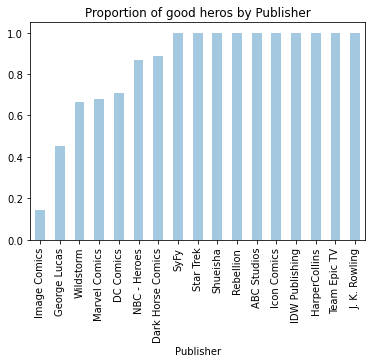

In [32]:
import matplotlib.pylab as plt

propPublisher.sort_values(inplace=True)
propPublisher.plot(kind='bar',style='b', alpha=0.4,title = "Proportion of good heros by Publisher")
plt.show()

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Filter the dataset to obtain only the heroes with the Publisher 'J. K. Rowling' </div>

In [33]:
name_publisher = 'J. K. Rowling'
# Your code here
data[data['Publisher']==name_publisher]

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
194,203,Male,green,Human,Black,182.25,J. K. Rowling,NaN,good,100.143137,...,False,True,False,False,False,False,False,False,False,False


<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Count the number of different races of super heroes using a groupby function. </div>

In [34]:
# Your code here
data[['Race', 'Id']].groupby('Race').count()

,Id
Race,
Alien,3
Alpha,4
Amazon,2
Android,4
Animal,2
Asgardian,1
Atlantean,4
Cosmic Entity,1
Cyborg,4


<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Fill the NaN values of the Hair color by the value 'Other' </div>

In [35]:
# Your code here
data.fillna(value={"Hair color":'Other'})

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,NaN,Yautja,Black,213.0,Dark Horse Comics,NaN,bad,234.0,...,False,False,False,False,False,False,False,False,False,False
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,NaN,good,86.0,...,False,False,False,False,False,False,False,False,False,False
2,2,Female,blue,Asgardian,Blond,175.0,Marvel Comics,NaN,good,143.0,...,False,False,False,False,False,False,False,False,False,False
3,3,Female,green,Mutant,Red,168.0,Marvel Comics,NaN,good,52.0,...,False,False,False,False,False,True,False,False,False,False
4,4,Female,Black,NaN,Black,163.0,Marvel Comics,NaN,good,50.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,386,Female,green,Human,Blond,157.0,Dark Horse Comics,NaN,good,52.0,...,False,False,False,False,False,False,False,False,False,False
369,387,Female,blue,Human,Blond,180.0,Marvel Comics,NaN,good,74.0,...,False,False,False,False,False,False,False,False,False,False
370,388,Female,green,NaN,Red,218.0,Marvel Comics,NaN,good,158.0,...,False,False,False,False,False,False,False,False,False,False
371,389,Female,blue,Mutant,Black,180.0,Marvel Comics,NaN,good,63.0,...,False,False,False,False,False,False,False,False,False,False


<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Select the superheroes with the superpower 'Web Creation' </div>

In [36]:
# Your code here

data[data['Web Creation']==True]

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
114,119,Male,Black,Symbiote,Blond,191.00,Marvel Comics,NaN,good,117.000000,...,True,False,False,True,False,False,False,False,False,False
140,146,Male,blue,Symbiote,Brown,188.00,Marvel Comics,NaN,good,97.000000,...,True,False,False,True,False,False,False,False,False,False
219,229,Male,brown,Human,No Hair,180.00,Marvel Comics,NaN,bad,79.000000,...,True,False,False,False,False,False,False,False,False,False
232,243,Female,brown,Human,Black,173.52,Marvel Comics,NaN,good,74.531885,...,True,False,False,False,False,False,False,False,False,False
249,260,Female,blue,Human,Brown,170.00,Marvel Comics,NaN,good,54.000000,...,True,False,False,False,False,False,False,False,False,False
308,324,Male,brown,Human,Brown,178.00,Marvel Comics,NaN,good,74.000000,...,True,False,False,False,False,False,False,False,False,False
310,326,Male,brown,Human,Black,157.00,Marvel Comics,NaN,good,56.000000,...,True,False,False,False,False,False,False,False,False,False
316,332,Male,brown,Symbiote,Black,175.00,Marvel Comics,NaN,good,77.000000,...,True,False,False,True,False,False,False,False,False,False
336,353,Male,brown,Human,Brown,193.00,Marvel Comics,NaN,good,113.000000,...,True,False,False,False,False,False,False,False,False,False


<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Count the number of female superheroes </div>

In [37]:
# Your code here

data[data['Gender']=='Female'].shape[0]

103

# Missing data

It can happen that some of the values of are data are missing. For example, given one superheroe we may not know their Height, or Weight or Race. When this happens, instead of having a numeric or cathegorical value, we find the value NaN. NaN stands for Not A Number, and means that the value was missing. When a value is missing we can not operate with it (obiously you can not sum or multiply a number that does not exist). 

When there are many missing values in a dataset, we need to do something to fill the gaps or erase the samples. The following figure shows a diagram which help us decide what to do with the missing data.

<img src="missing_data.jpg" alt="Missing data" width=700>


Now let's go through this diagram step by step:



### 1. Does missing data encode any information? 

**Yes:** Sometimes missing data can provide helpful information. For example, imagine you have data about the results of a medical test which have been applied to some patients, and you want to predict the gravity of their disease. Now image that one of the patients has a missing value in the medical test. This fact could mean that the patient in fact did not take the test, since the doctor thought it was not necessary. This provides a lot of information. In this case, we should replace this NaN by a new cathegory, such as 'Test not taken'.

<p><center><i>Sometimes the lack of information is information</i></center></p>
    

### 2. Is missing data small?

**Yes**: Sometimes we have a large dataset and very few missing data. Imagine you have a dataset with 1,000,000 samples and only 2 of them have missing values. In this case the missing values are probably just mistakes, and the easiest you can do is delete the samples with missing values. After all, after deleting these samples you still have a big dataset. 

Notice that you can only do this when the number of missing values is much smaller than the size of the dataset. If in the previous example you only had 100 samples and 20 of them had missing values, I would not recommend to just delete them.

### 3. Is the distribution data simple? In other words, given other samples or features, can we predict the missing value?

**Yes:** Sometimes we can predict the missing value using other information of the dataset. In this situations there are two options:

+ **To use the same feature from other samples**: Imagine that the missing value corresponds to a time series. That is, a variable that changes with time. For example, imagine we have the temperature as a function of time. If the temperature at a particular time is missing, we may be able to use the past and future temperatures to predict the missing one.

+ **To use other features from the same sample:** We may have other features which can help us infer the missing value. For example, imagine we have a dataset of different animals. We have two features: the volume of the animal and the weight of the animal. It is clear that these two features are correlated: bigger animals tend to weight more. Therefore, if the weight of an animal is missing, we can try to use its volume to infer its weight. We can do it even bettwe by selecting similar animals to the one we are considering (for example we could separate between mammals, reptiles and birds).

**No:** When we can not infer the exact missing value using other features or samples, we can replace the missing value with the mean (or median) value of the feature. For example, if the height is missing we can simply input the mean height of all the samples.


**Remark:** This is not rocket science! There is usually not a single correct way to infer the missing values. Usually the best option is to try more than one reasonable approach and see which one works better.

### Our missing data

Now let's have a look at our missing data. We plot the proportion of missing values for each feature.

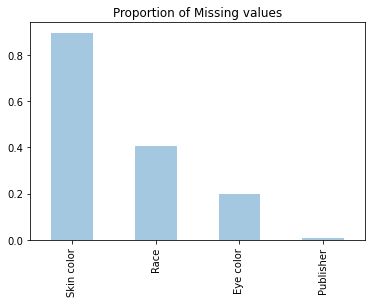

In [38]:
isMissing = data.isnull().apply(lambda x: x.sum()/x.count(), axis=0)
isMissing[isMissing>0].sort_values(ascending=False).plot(kind='bar',style='b',
                                                         alpha=0.4,title = "Proportion of Missing values")
plt.show()

Luckily, there are only 4 features with missing values (out of the 177 features we have in total). Let's look at each feature one by one and see what we can do.

### 1. Skin color

We see that the skin color is, by far, the feature with more missing values.

In [39]:
print('Proportion of missing values of Skin color: {:.2f}'.format(isMissing['Skin color']))

Proportion of missing values of Skin color: 0.90


Let's look at the non-null values of the skin color:

In [40]:
data['Skin color'].unique()

array([nan, 'orange', 'gray', 'green', 'blue', 'red', 'pink', 'grey',
       'purple'], dtype=object)

We can see that the non-NaN colors are rather strange (non-human). In this situations, I see two options:

1. Drop the skin color column because there are a lot of NaN values.

2. Fill the NaN values with 0 and all the non-NaN values with 1. In this case, 0 would mean "normal/human" skin color, and 1 would mean "strange/non-human" skin color.

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Fill the missing values of the Skin color feature with one of the two options above. Choose the one you prefer. </div>

In [41]:
# Option 1: drop column

#data = # Your code here

#data = data.drop('Skin color', axis=1)
# Hit: Use function drop

In [42]:
# Option 2: Replace NaN by 0, and non-NaN by 1

# step 1: replace non-NaN by 1

colors = ['gold', 'silver', 'gray', 'green', 'blue', 'red', 'pink', 'grey', 'orange', 'purple']
#data['Skin color'] = # Your code here
data['Skin color'] = data['Skin color'].replace(colors, 1)
# Hint: Use replace() function with the list of colors above

# step 2: Fill NaN with 0
#data['Skin color'] = # your code here
data['Skin color'] = data['Skin color'].fillna(0)

# Hint: use fillna() function
# Check if the result is correct
data['Skin color'].unique()

array([0., 1.])

### 2. Publisher

With the Publisher feature iwe have the opposite situation. In this case the proportion of samples with missing Publisher is very small. We can simply remove the samples with NaN values in the Publisher. To do so, we use the function pd.isnull() to detect the elements with NaN values in the Publisher feature. Then, we select the samples with non-null value.

`pd.isnull(data['Publisher'])` returns True for the samples which have NaN value in the Publisher feature, and False for the other samples. Then, we use the symbol ~ to negate the previous value, so that the samples with NaNs have the value False, and the non-Nans have the value True. Finally, we select the samples with True value, as it is shown in the next cell.

In [43]:
# Removing the samples with NaN in the Publisher feature

data = data[~pd.isnull(data['Publisher'])]

### 3. Race

In the case of the Race feature the proportion of missing values is around 40%. Therefore, we should find a way of missing these values other than deleting the feature or the samples with missing value. Let's look at the Race values:

In [44]:
data.Race.unique()

array(['Yautja', 'Human', 'Asgardian', 'Mutant', nan, 'Alpha', 'Animal',
       'Zombie', 'Alien', "Yoda's species", 'Kryptonian', 'Vampire',
       'Android', 'Atlantean', 'Demon', 'Cyborg', 'Amazon', 'Symbiote',
       'Talokite', 'Metahuman', 'God', 'Dathomirian Zabrak', 'Rodian',
       'Gungan', 'Cosmic Entity', 'Neyaphem', 'Flora Colossus', 'Ungaran',
       'Eternal', 'Gorilla', 'Zen-Whoberian', 'Luphomoid',
       'Icthyo Sapien', 'Tamaranean', 'Spartoi'], dtype=object)

We see that there are a lot of different races of superheroes. Since it is quite difficult to infer the race of a new superheroe based on their superpowers (or at least I don't know how to do it), we can simply add a new cathegory named 'Other', which means that the superheroe belongs to a diffenrent, unknown race. 

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Fill the missing values of the Race feature replacing NaN by 'Other'. </div>

In [45]:
#data['Race'] = # Your code here

data['Race'] = data['Race'].fillna('Other')
# Hint: Use the function .fillna()

### 4. Eye color

The proportion of the missing values for the Eye color is relatively high, so that we shouldn't erase the samples with missing Eye color. In this case, we are going to replace the missing values by the most common Eye color. 

In [46]:
data['Eye color'].unique()

array([nan, 'brown', 'blue', 'green', 'Black', 'orange', 'red', 'grey',
       'yellow', 'purple', 'violet', 'gray'], dtype=object)

Since the Eye color is a cathegorical variable (it is not numerical), we can not use the mean value of the Eye comlor to fill the missing values. In this case, we will use the mode, which is the most common Eye color.

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Fill the missing values of the Eye color using the mode. </div>

In [47]:
mode = str(data['Eye color'].mode().values[0])
#data['Eye color'] = # Your code here
data['Eye color'] = data['Eye color'].fillna(mode)
# Hint: Use the function fillna() passing the mode as an argument.

We have finished filling the missing values! Congratulations! Now let's check that indeed there are no missing values left:

In [48]:
data.isnull().sum()[:10]

Id            0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

# Dealing with Categorical variables

Categorical variables are the ones whose values are names or labels. For example, the Eye color (`green, blue, brown`, ...) is a categorical variable. Also, a superpower taking values `True/False` is also a categorical variable. Basically, categorical variables are the ones which are not numeric. An example of non-categorical variable (i.e quantitavie variable) is the Height of the superheore, which takes values in cm. 

If we want to train a machine learning model, we need to transform the categorical variables into numbers somehow, because we can not do mathematical operations with the color `green`, or the label `True`. Let's see what we can do with these variables.

## 1. Binary variables

Let's start with the simplest case. Binary variables are the ones which only take two possible values. All the superpowers are binary variables, since their value is `True/False`. The Alignment of the superheroe is also a binary variable since its values are `good/bad`, and Gender as well since it takes values `Male/Female`. 

In this case it is pretty easy to transform these variables into numerical variables. We just have to change `True/False`, `good/bad` and `Male/Female` by 1/0. In the case of the superpowers, 0 will be `False` and 1 will be `True`. For the alignment, 0 will mean `bad` and 1 will mean `good`.For the gender, 0 will mean `Male` and 1 will mean `Female`. Let's do it.

First, we start with the superpowers:

In [49]:
data = data.replace(to_replace=(True, False), value=(1,0))

data.head()

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,blue,Yautja,Black,213.0,Dark Horse Comics,0.0,bad,234.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,0.0,good,86.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Female,blue,Asgardian,Blond,175.0,Marvel Comics,0.0,good,143.0,...,0,0,0,0,0,0,0,0,0,0
3,3,Female,green,Mutant,Red,168.0,Marvel Comics,0.0,good,52.0,...,0,0,0,0,0,1,0,0,0,0
4,4,Female,Black,Other,Black,163.0,Marvel Comics,0.0,good,50.0,...,0,0,0,0,0,0,0,0,0,0


We see that we have replaces `True/False` by 1/0. Let's do the same for the Alignment variable.

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Replace good/bad for 1/0 in the Alignment variable. </div>

In [50]:
#data = #Your code here

data = data.replace(to_replace=('good', 'bad'), value=(1,0))

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Replace Male/Female for 0/1 in the Gender variable. </div>

In [51]:
#data = #Your code here

data = data.replace(to_replace=('Male', 'Female'), value=(0,1))

## 2. Multi-category variables

The second and most challenbging kind of variables are the multi-category. These variables have more than two categorical values. One example is the Eye color, which can have values `green, blue, brown, gray, ...`. 

What do we do with these variables? One option would be to subsitute each category by a number, instead of `green, blue, brown, gray`we could have 0,1,2,3. However, this is a bad approach because the distance bewteen the categories is not constant. That is, the distance between green and blue would be 1-0 = 1, while the distance between gray and green would be 3-0 = 3. However, there is no reason why gray should be farther apart to green than blue. So, we need to look for another option.

What is usually done in these situations is to use a techniue called **One-hot encoding**. This technique transforms the categorical feature with $K$ categories (for example $K$ eye colors) into $K-1$ features. Each feature answer the questions: `is green?`, `is blue?`, `is brown?`. These new features have now two values, either  1  if the question is true, or  0  otherwise. If all the answers are 0, it means that the eye color is gray. Let's see an example. Imagine we have the following superheroes:

| Superheroe id | Eye color |
| ------------- | --------- |
| 1             | Green     |
| 2             | Blue      |
| 3             | Brown     |
| 4             | Gray      |

After performing One-hot encoding, we would have the following table:

| Superheroe id | Is green? | Is blue? | Is brown? |
| ------------- | --------- | -------- | --------- |
| 1             | 1         | 0        | 0         |
| 2             | 0         | 1        | 0         |
| 3             | 0         | 0        | 1         |
| 4             | 0         | 0        | 0         |

You can see that for each eye color (minus one) we generate a new feature. 

Let's apply this to our data. In our dataset we have the following multi-category variables:

`Eye color`, `Race`, `Hair color` and `Publisher`.

Let's  have a look at each of them.

### 1. Eye color

Let's look at the distribution of Eye color.

C:\Users\laiad\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


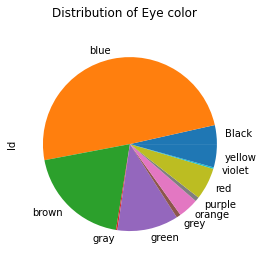

In [52]:
dataEye = data[['Id','Eye color']].groupby('Eye color').count()/data.shape[0]

dataEye.plot(kind='pie',subplots=True,legend=False,title = "Distribution of Eye color")
plt.show()

We can see that most of the superheroes have common eye colors such as blue, brown, green or black. Only a small proportion of them have unusual eye colors such as red, violet, purple, orange, ... 

When we perform One-hot enconding to the Eye color variable, we create one new feature for each eye color. Having too many features is not very good for a model, since it makes learning more and more difficult. Therefore, it is advisable to join all 'rare' categories into one new catregory. That's what we will do now. We will replace all 'rare' eye colors by the category 'other'.

In [53]:
rare_colors = ['orange', 'red', 'grey', 'yellow', 'purple', 'violet', 'gray']
data['Eye color'] = data['Eye color'].replace(rare_colors, 'other')

Now that we have fewer categories, let's perform One-hot encoding. We use the function `pd.get_dummies()`to obtain the encoded features. Then, we add them to our dataframe using the function `pd.concat()` and finally remove the Eye color feature.

In [54]:
Eye_encoded = pd.get_dummies(data['Eye color'], prefix='Eye')
data = pd.concat([data, Eye_encoded], axis=1)
data = data.drop('Eye color', axis=1)

### 2. Hair color

Let's do the same with the Hair color.

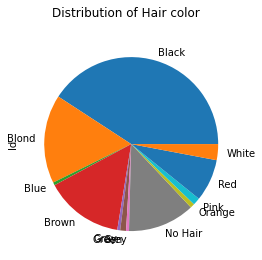

In [55]:
dataHair = data[['Id','Hair color']].groupby('Hair color').count()/data.shape[0]

dataHair.plot(kind='pie',subplots=True,legend=False,title = "Distribution of Hair color")
plt.show()

We join the uncommon categories into the 'Other' category.

In [56]:
rare_colors = ['Blue', 'Gray', 'Grey', 'Orange', 'Green', 'Pink', 'White', 'Red']
data['Hair color'] = data['Hair color'].replace(rare_colors, 'Other')

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Perform One-hot encoding to hair color (just like we did with Eye color). </div>

In [57]:
#Hair_encoded = # Use function pd.get_dummies
#data = # Use function pd.concat
#data = # Use funciton drop

Hair_encoded = pd.get_dummies(data['Hair color'], prefix='Hair')
data = pd.concat([data, Hair_encoded], axis=1)
data = data.drop('Hair color', axis=1)

### 3. Race

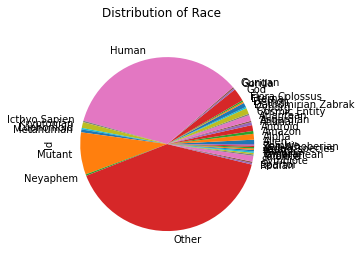

In [58]:
dataRace = data[['Id','Race']].groupby('Race').count()/data.shape[0]

dataRace.plot(kind='pie',subplots=True,legend=False,title = "Distribution of Race")
plt.show()

In this case we observe that there are a lot of races which appear very few times. In this case, we will join all the non-human races into an 'Other' category. 

In [61]:
#aux = data['Race']

#aux[aux!='Human'] = 'Other'

#data['Race'] = aux

#data['Race'].unique()

<ipython-input-61-ee047343e3f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[aux!='Human'] = 'Other'


array(['Other', 'Human'], dtype=object)

In [62]:
data['Race'][(data['Race'] != 'Human')] = 'Other'

<ipython-input-62-7cd61b21ad40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Race'][(data['Race'] != 'Human')] = 'Other'


In [64]:
data['Race'].unique()

array(['Other', 'Human'], dtype=object)

Notice that we have transformed the Race variable into a **binary** variable. Therefore, we do not need to perform one hot encoding, but just replace Human by 1 and Other by 0, just as we did with Gender, Alignment and all the superpowers.

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Replace Human by 1 and Other by 0 in the Race variable. </div>

In [62]:
# data['Race'] = # Your code here
data['Race'] = data['Race'].replace(to_replace=('Human', 'Other'), value=(1,0))
data

,Id,Gender,Race,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,...,Eye_Black,Eye_blue,Eye_brown,Eye_green,Eye_other,Hair_Black,Hair_Blond,Hair_Brown,Hair_No Hair,Hair_Other
0,0,0,0,213.0,Dark Horse Comics,0.0,0,234.0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,1,0,1,185.0,Marvel Comics,0.0,1,86.0,1,1,...,0,0,1,0,0,0,0,1,0,0
2,2,1,0,175.0,Marvel Comics,0.0,1,143.0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,1,0,168.0,Marvel Comics,0.0,1,52.0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,4,1,0,163.0,Marvel Comics,0.0,1,50.0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,386,1,1,157.0,Dark Horse Comics,0.0,1,52.0,1,1,...,0,0,0,1,0,0,1,0,0,0
369,387,1,1,180.0,Marvel Comics,0.0,1,74.0,1,1,...,0,1,0,0,0,0,1,0,0,0
370,388,1,0,218.0,Marvel Comics,0.0,1,158.0,1,0,...,0,0,0,1,0,0,0,0,0,1
371,389,1,0,180.0,Marvel Comics,0.0,1,63.0,0,1,...,0,1,0,0,0,1,0,0,0,0


### 4. Publisher

C:\Users\laiad\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


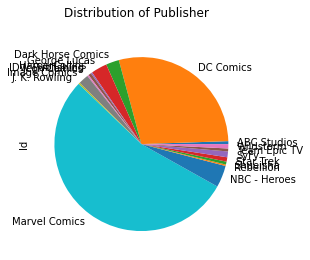

In [63]:
dataPublisher= data[['Id','Publisher']].groupby('Publisher').count()/data.shape[0]

dataPublisher.plot(kind='pie',subplots=True,legend=False,title = "Distribution of Publisher")
plt.show()

The most common Publishers are DC Comics and Marvel Comics. We replace the other categories by 'Other'.

In [64]:
rare_publisher = ['Dark Horse Comics', 'ABC Studios', 'Image Comics', 'SyFy', 'NBC - Heroes', 'Wildstorm',
                  'George Lucas', 'HarperCollins', 'Team Epic TV', 'Shueisha','Icon Comics', 'J. K. Rowling',
                  'Star Trek', 'IDW Publishing', 'Rebellion']

data['Publisher'] = data['Publisher'].replace(rare_publisher, 'Other')

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Perform One-hot encoding to Publisher variable (just like we did with Eye color). </div>

In [65]:
#Publisher_encoded = # Use function pd.get_dummies
#data = # Use function pd.concat
#data = # Use funciton drop

Publisher_encoded = pd.get_dummies(data['Publisher'], prefix='Publisher')
data = pd.concat([data, Publisher_encoded], axis=1)
data = data.drop('Publisher', axis=1)

We have finished working with the categorical variables. You can see that now the dataset only has numbers, and not text. Also, we have increased the number of columns from 177 to 187.

In [66]:
data.head()

,Id,Gender,Race,Height,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,...,Eye_green,Eye_other,Hair_Black,Hair_Blond,Hair_Brown,Hair_No Hair,Hair_Other,Publisher_DC Comics,Publisher_Marvel Comics,Publisher_Other
0,0,0,0,213.0,0.0,0,234.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,1,185.0,0.0,1,86.0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2,2,1,0,175.0,0.0,1,143.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,3,1,0,168.0,0.0,1,52.0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,4,1,0,163.0,0.0,1,50.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Data normalization

If you look at our dataset, you will see that all the features have values 0/1 except for the Height and the Weight, which have numerical values of around 50-200. 

Usually machine learning models compute distances between samples to group similar samples (similar heroes) in order to predict the dependant variable (their Alignment). In order to calculate these distance, it is important that all the features have more or less the same range of values. Otherwise, the features with higher values will be thought of being more important than the features with lower values. One example of models which uses distances to predict the dependant variable is the K-Nearest Neighbours.

For this reason, we are going to normalize the Height and Weight variables. We will do a Min-Max normalization, which transforms the data into the [0-1] range:

$$\tilde{x} = \frac{x-\min(x)}{\max(x)-\min(x)}$$

We will use the library `sklearn` to normalize the data.

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Height', 'Weight']] = scaler.fit_transform(data[['Height', 'Weight']])

data.head()

,Id,Gender,Race,Height,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,...,Eye_green,Eye_other,Hair_Black,Hair_Blond,Hair_Brown,Hair_No Hair,Hair_Other,Publisher_DC Comics,Publisher_Marvel Comics,Publisher_Other
0,0,0,0,0.272185,0.0,0,0.284663,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,1,0.230425,0.0,1,0.103067,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2,2,1,0,0.215511,0.0,1,0.173006,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,3,1,0,0.205071,0.0,1,0.061350,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,4,1,0,0.197614,0.0,1,0.058896,0,0,0,...,0,0,1,0,0,0,0,0,1,0


Now you can see that the values of Height and Weight are between 0 and 1, and all the features are comparable.

# Creating and deleting variables

One of the most challenging tasks for a data scientist is to select the variables that will be given to a machine learning model. Usually, defining useful variables and dropping the unuseful ones is what helps a machine learning model to work properly. 

In this section we are going to see if there is any useless variable, and if we can create new variables. Let's start with the first one.

## Dropping useless variables

It is not always clear which variables will be useful for the final model. However, it is always good to get to know the dataset and get an intutiotion of what the variables mean. Sometimes, just by common sense we can create and erase variables. In this section we will see if there are superpowers that none of the superheros have. These superpowers will then be useless to the model.

In order to do so, we will create a dataset with all the superpowers and calculate the proportion of superheros that have that superpower.

In [68]:
dataSuperPowers = data.drop(['Id', 'Gender', 'Race', 'Height', 'Skin color', 'Alignment', 'Weight'], axis=1)
dataPropPowers = dataSuperPowers.sum(axis=0)/dataSuperPowers.count()

dataPropPowers.head(10)

Agility                  0.345946
Accelerated Healing      0.267568
Lantern Power Ring       0.018919
Dimensional Awareness    0.035135
Cold Resistance          0.081081
Durability               0.375676
Stealth                  0.191892
Energy Absorption        0.127027
Flight                   0.308108
Danger Sense             0.064865
dtype: float64

The next line shows the superpowers with a proportion equal to zero, that is, that none of the superheros has that superpower.

In [70]:
useless_superpowers = dataPropPowers.index[dataPropPowers<=0.05]
useless_superpowers

Index(['Lantern Power Ring', 'Dimensional Awareness', 'Underwater breathing',
       'Power Augmentation', 'Cryokinesis', 'Energy Armor', 'Duplication',
       'Density Control', 'Astral Travel', 'Audio Control',
       ...
       'Reality Warping', 'Odin Force', 'Symbiote Costume', 'Speed Force',
       'Phoenix Force', 'Molecular Dissipation', 'Vision - Cryo',
       'Omnipresent', 'Omniscient', 'Eye_Black'],
      dtype='object', length=119)

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Drop the `useless_superpowers` columns from the dataset. </div>

In [71]:
# data = #Your code here
# Hint: Use the function drop
data = data.drop(useless_superpowers, axis=1)

## Defining new variables

Defining new variables is not easy, and it depends on our imagination. Here I propose to create a new variable which is the number of superpowers each superheroe has. Remember that all the variables need to be normalized (between 0 and 1). In order to do so, I will divide the number of superpowers by the total amount of superpowers.

In [69]:
numSuperPowers  = dataSuperPowers.sum(axis=1)/dataSuperPowers.shape[1]

0      0.133333
1      0.150000
2      0.061111
3      0.116667
4      0.033333
         ...   
368    0.083333
369    0.200000
370    0.044444
371    0.072222
372    0.083333
Length: 370, dtype: float64

In [86]:
BMI = data['Weight']/(data['Height']+1)**2

scaler = MinMaxScaler()
BMI = scaler.fit_transform(BMI.values.reshape(-1,1))

In [87]:
data['BMI'] = BMI

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Add a new variable to the dataset containing the number of superpowers.</div>

In [73]:
# Your code here
data['numSuperPowers'] = numSuperPowers

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Think of possible new variables and try to add them to the dataset.</div>

In [74]:
# Your code here

In [75]:
data.head()

,Id,Gender,Race,Height,Skin color,Alignment,Weight,Agility,Accelerated Healing,Cold Resistance,...,Eye_other,Hair_Black,Hair_Blond,Hair_Brown,Hair_No Hair,Hair_Other,Publisher_DC Comics,Publisher_Marvel Comics,Publisher_Other,numSuperPowers
0,0,0,0,0.272185,0.0,0,0.284663,0,1,1,...,0,1,0,0,0,0,0,0,1,0.133333
1,1,0,1,0.230425,0.0,1,0.103067,1,1,0,...,0,0,0,1,0,0,0,1,0,0.150000
2,2,1,0,0.215511,0.0,1,0.173006,0,0,0,...,0,0,1,0,0,0,0,1,0,0.061111
3,3,1,0,0.205071,0.0,1,0.061350,1,0,0,...,0,0,0,0,0,1,0,1,0,0.116667
4,4,1,0,0.197614,0.0,1,0.058896,0,0,0,...,0,1,0,0,0,0,0,1,0,0.033333


# Classification models (Finally!)

Once we have prepared the dataset, we can finally train a classifier. Remember that to train a classifier we need to separate the training data into Train, Validation and Test sets. The train set will be used to train the classifer, the validation set will be used to select the model with the best accuracy and the test set will be used to test the final accuracy of the model.

### 1. Separate X and y data

In [88]:
y = data.Alignment
X = data.drop(['Alignment', 'Id'], axis=1, inplace=False)

### 2. Separate Training, Validation and test set

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state=42, stratify=y_train)

print('Train size={}, validation size={}, test size={}'.format(X_train.shape[0],X_val.shape[0],X_test.shape[0]))

Train size=266, validation size=48, test size=56


### 3. Train classifier

Now that we have our data prepared we can finally train a classifier. In this case, I chose the [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) from `sklearn`. Of course, there are many other models that we could try.

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=5, learning_rate=0.1, max_depth=5, 
                                 min_samples_split=3, min_samples_leaf=1,
                                 random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_val)

In [101]:
print('Validation accuracy: ', clf.score(X_val, y_val))

Validation accuracy:  0.7083333333333334


<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Change the internal parameters of the classifier (n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf) and select the parameters which give a better accuracy in the validation test.</div>

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Try other classifiers from sklearn and select the one which gives the best accuracy on the validation set.</div>

Some examples of classifiers that you could try are:

+ [GaussianProcessClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html)
+ [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
+ [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
+ [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
+ [QuadraticDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)
+ [RBF](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html#sklearn.gaussian_process.kernels.RBF)

In [80]:
# Import classifier

clf2 = clf# Your classifier
clf2.fit(X_train, y_train)
y_hat = clf2.predict(X_val)

print('Validation accuracy: ', clf2.score(X_val, y_val))

Validation accuracy:  0.7083333333333334


<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Finally, report the accuracy of the best classifier in the test set.</div>

In [81]:
classifier = clf# Your best classifier
print('Test accuracy: ', classifier.score(X_test, y_test))

Test accuracy:  0.7321428571428571
